# 4   Writing Structured Programs

## 4.1   Back to the Basics

In [1]:
empty = []
nested = [empty, empty, empty]
nested

[[], [], []]

In [2]:
nested[1].append('Python')
nested

[['Python'], ['Python'], ['Python']]

In [3]:
nested = [[]] * 3
nested[1].append('Python')
nested[1] = ['Monty']
nested

[['Python'], ['Monty'], ['Python']]

In [4]:
size = 5
python = ['Python']
snake_nest = [python] * size
snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] == snake_nest[4]

True

In [5]:
snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4]

True

In [7]:
import random
position = random.choice(range(size))
snake_nest[position] = ['Python']
snake_nest

[['Python'], ['Python'], ['Python'], ['Python'], ['Python']]

In [8]:
snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] == snake_nest[4]

True

In [9]:
snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4]

False

In [10]:
[id(snake) for snake in snake_nest]

[140203457633480,
 140203457728776,
 140203457750664,
 140203457728776,
 140203457728776]

In [11]:
mixed = ['cat', '', ['dog'], []]
for element in mixed:
    if element:
        print(element)

cat
['dog']


In [12]:
sent = ['No', 'good', 'fish', 'goes', 'anywhere', 'without', 'a', 'porpoise', '.']
all(len(w) > 4 for w in sent)

False

In [13]:
any(len(w) > 4 for w in sent)

True

## 4.2   Sequences

In [15]:
t = 'walk', 'fem', 3
t

('walk', 'fem', 3)

In [16]:
t[0]

'walk'

In [17]:
t[1:]

('fem', 3)

In [18]:
len(t)

3

In [19]:
raw = 'I turned off the spectroroute'
text = ['I', 'turned', 'off', 'the', 'spectroroute']
pair = (6, 'turned')
raw[2], text[3], pair[1]

('t', 'the', 'turned')

In [20]:
raw[-3:], text[-3:], pair[-3:]

('ute', ['off', 'the', 'spectroroute'], (6, 'turned'))

In [21]:
len(raw), len(text), len(pair)

(29, 5, 2)

In [24]:
import nltk
from nltk import word_tokenize

In [25]:
raw = 'Red lorry, yellow lorry, red lorry, yellow lorry.'
text = word_tokenize(raw)
fdist = nltk.FreqDist(text)
sorted(fdist)

[',', '.', 'Red', 'lorry', 'red', 'yellow']

In [26]:
for key in fdist:
    print(key + ':', fdist[key], end='; ')

red: 1; yellow: 2; ,: 3; Red: 1; lorry: 4; .: 1; 

In [27]:
words = ['I', 'turned', 'off', 'the', 'spectroroute']
words[2], words[3], words[4] = words[3], words[4], words[2]
words

['I', 'turned', 'the', 'spectroroute', 'off']

In [28]:
words = ['I', 'turned', 'off', 'the', 'spectroroute']
tags = ['noun', 'verb', 'prep', 'det', 'noun']
list(zip(words, tags))

[('I', 'noun'),
 ('turned', 'verb'),
 ('off', 'prep'),
 ('the', 'det'),
 ('spectroroute', 'noun')]

In [29]:
list(enumerate(words))

[(0, 'I'), (1, 'turned'), (2, 'off'), (3, 'the'), (4, 'spectroroute')]

In [30]:
text = nltk.corpus.nps_chat.words()

In [31]:
cut = int(0.9 * len(text))
training_data, test_data = text[:cut], text[cut:]
text == training_data + test_data

True

In [32]:
len(training_data) / len(test_data)

9.0

In [33]:
words = 'I turned off the spectroroute'.split() 
wordlens = [(len(word), word) for word in words]
wordlens.sort()
' '.join(w for (_, w) in wordlens)

'I off the turned spectroroute'

In [34]:
lexicon = [
    ('the', 'det', ['Di:', 'D@']),
    ('off', 'prep', ['Qf', 'O:f'])
]

In [35]:
lexicon.sort()
lexicon[1] = ('turned', 'VBD', ['t3:nd', 't3`nd'])
del lexicon[0]
lexicon

[('turned', 'VBD', ['t3:nd', 't3`nd'])]

In [36]:
text = '''"When I use a word," Humpty Dumpty said in rather a scornful tone,
"it means just what I choose it to mean - neither more nor less."'''
print([w.lower() for w in nltk.word_tokenize(text)])

['``', 'when', 'i', 'use', 'a', 'word', ',', "''", 'humpty', 'dumpty', 'said', 'in', 'rather', 'a', 'scornful', 'tone', ',', "''", 'it', 'means', 'just', 'what', 'i', 'choose', 'it', 'to', 'mean', '-', 'neither', 'more', 'nor', 'less', '.', "''"]


In [37]:
max([w.lower() for w in nltk.word_tokenize(text)])

'word'

In [39]:
max(w.lower() for w in word_tokenize(text))

'word'

## 4.3   Questions of Style

In [40]:
tokens = nltk.corpus.brown.words(categories='news')

In [41]:
count = 0
total = 0
for token in tokens:
    count += 1
    total += len(token)
total / count

4.401545438271973

In [42]:
total = sum(len(t) for t in tokens)
print (total / len(tokens))


4.401545438271973


In [43]:
word_list = []
i = 0
while i < len(tokens):
    j = 0
    while j < len(word_list) and word_list[j] <= tokens[i]:
        j += 1
    if j == 0 or tokens[i] != word_list[j-1]:
        word_list.insert(j, tokens[i])
    i += 1

In [44]:
print(word_list[:10])

['!', '$1', '$1,000', '$1,000,000,000', '$1,500', '$1,500,000', '$1,600', '$1,800', '$1.1', '$1.4']


In [45]:
word_list = sorted(set(tokens))
print(word_list[:10])

['!', '$1', '$1,000', '$1,000,000,000', '$1,500', '$1,500,000', '$1,600', '$1,800', '$1.1', '$1.4']


In [46]:
fd = nltk.FreqDist(nltk.corpus.brown.words())
cumulative = 0.0
most_common_words = [word for (word, count) in fd.most_common()]
for rank, word in enumerate(most_common_words):
    cumulative += fd.freq(word)
    print("%3d %6.2f%% %s" % (rank + 1, cumulative * 100, word))
    if cumulative > 0.25:
        break

  1   5.40% the
  2  10.42% ,
  3  14.67% .
  4  17.78% of
  5  20.19% and
  6  22.40% to
  7  24.29% a
  8  25.97% in


In [47]:
text = nltk.corpus.gutenberg.words('milton-paradise.txt')
longest = ''
for word in text:
    if len(word) > len(longest):
        longest = word

longest


'unextinguishable'

In [48]:
maxlen = max(len(word) for word in text)
print([word for word in text if len(word) == maxlen])


['unextinguishable', 'transubstantiate', 'inextinguishable', 'incomprehensible']


In [49]:
sent = ['The', 'dog', 'gave', 'John', 'the', 'newspaper']
n = 3
[sent[i:i+n] for i in range(len(sent)-n+1)]

[['The', 'dog', 'gave'],
 ['dog', 'gave', 'John'],
 ['gave', 'John', 'the'],
 ['John', 'the', 'newspaper']]

In [51]:
import pprint
m, n = 3, 7
array = [[set() for i in range(n)] for j in range(m)]
array[2][5].add('Alice')
pprint.pprint(array)

[[set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), {'Alice'}, set()]]


In [52]:
array = [[set()] * n] * m
array[2][5].add(7)
pprint.pprint(array)

[[{7}, {7}, {7}, {7}, {7}, {7}, {7}],
 [{7}, {7}, {7}, {7}, {7}, {7}, {7}],
 [{7}, {7}, {7}, {7}, {7}, {7}, {7}]]


## 4.4   Functions: The Foundation of Structured Programming

In [53]:
import re
def get_text(file):
    """Read text from a file, normalizing whitespace and stripping HTML markup."""
    text = open(file).read()
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text

In [54]:
def repeat(msg, num):
    return ' '.join([msg] * num)
monty = 'Monty Python'
repeat(monty, 3)

'Monty Python Monty Python Monty Python'

In [55]:
def monty():
    return "Monty Python"
monty()

'Monty Python'

In [56]:
repeat(monty(), 3)

'Monty Python Monty Python Monty Python'

In [57]:
def my_sort1(mylist):      # good: modifies its argument, no return value
    mylist.sort()
def my_sort2(mylist):      # good: doesn't touch its argument, returns value
    return sorted(mylist)
def my_sort3(mylist):      # bad: modifies its argument and also returns it
    mylist.sort()
    return mylist

In [58]:
def set_up(word, properties):
    word = 'lolcat'
    properties.append('noun')
    properties = 5

In [59]:
w = ''
p = []
set_up(w, p)
w

''

In [60]:
p

['noun']

In [61]:
p = []
properties = p
properties.append('noun')
properties = 5
p

['noun']

In [62]:
def tag(word):
    if word in ['a', 'the', 'all']:
        return 'det'
    else:
        return 'noun'

In [63]:
tag('the')

'det'

In [64]:
tag('knight')

'noun'

In [65]:
def tag(word):
    assert isinstance(word, basestring), "argument to tag() must be a string"
    if word in ['a', 'the', 'all']:
        return 'det'
    else:
        return 'noun'

In [73]:
from urllib import request
from bs4 import BeautifulSoup

def freq_words(url, freqdist, n):
    html = request.urlopen(url).read().decode('utf8')
    raw = BeautifulSoup(html, "lxml").get_text()
    for word in word_tokenize(raw):
        freqdist[word.lower()] += 1
    result = []
    for word, count in freqdist.most_common(n):
        result = result + [word]
    print(result)

In [74]:
constitution = "http://www.archives.gov/exhibits/charters/constitution_transcript.html"
fd = nltk.FreqDist()
freq_words(constitution, fd, 30)

["''", ',', 'the', ':', ':1', 'of', ';', '}', '{', '(', ')', '#', "'", 'archives', '.', 'and', '[', 'a', 'national', ']', '``', 'constitution', 'to', 'declaration', 'documents', 'rights', '.section-theme', 'freedom', 'charters', 'color']


In [79]:
from urllib import request
from bs4 import BeautifulSoup

def freq_words(url, n):
    html = request.urlopen(url).read().decode('utf8')
    text = BeautifulSoup(html, "lxml").get_text()
    freqdist = nltk.FreqDist(word.lower() for word in word_tokenize(text))
    return [word for (word, _) in fd.most_common(n)]

In [80]:
freq_words(constitution, 30)

["''",
 ',',
 'the',
 ':',
 ':1',
 'of',
 ';',
 '}',
 '{',
 '(',
 ')',
 '#',
 "'",
 'archives',
 '.',
 'and',
 '[',
 'a',
 'national',
 ']',
 '``',
 'constitution',
 'to',
 'declaration',
 'documents',
 'rights',
 '.section-theme',
 'freedom',
 'charters',
 'color']

In [81]:
def accuracy(reference, test):
    """
    Calculate the fraction of test items that equal the corresponding reference items.

    Given a list of reference values and a corresponding list of test values,
    return the fraction of corresponding values that are equal.
    In particular, return the fraction of indexes
    {0<i<=len(test)} such that C{test[i] == reference[i]}.

        >>> accuracy(['ADJ', 'N', 'V', 'N'], ['N', 'N', 'V', 'ADJ'])
        0.5

    :param reference: An ordered list of reference values
    :type reference: list
    :param test: A list of values to compare against the corresponding
        reference values
    :type test: list
    :return: the accuracy score
    :rtype: float
    :raises ValueError: If reference and length do not have the same length
    """

    if len(reference) != len(test):
        raise ValueError("Lists must have the same length.")
    num_correct = 0
    for x, y in zip(reference, test):
        if x == y:
            num_correct += 1
    return float(num_correct) / len(reference)

In [82]:
accuracy(['ADJ', 'N', 'V', 'N'], ['N', 'N', 'V', 'ADJ'])

0.5

## 4.5   Doing More with Functions

In [83]:
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the',
        'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']
def extract_property(prop):
    return [prop(word) for word in sent]
extract_property(len)

[4, 4, 2, 3, 5, 1, 3, 3, 6, 4, 4, 4, 2, 10, 1]

In [84]:
def last_letter(word):
    return word[-1]
extract_property(last_letter)

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

In [87]:
def cmp(a, b):
    return (a > b) - (a < b) 

In [90]:
import functools
print(sorted(sent))
print(sorted(sent, key=functools.cmp_to_key(cmp)))
print(sorted(sent, key=functools.cmp_to_key(lambda x, y: cmp(len(y), len(x)))))

[',', '.', 'Take', 'and', 'care', 'care', 'of', 'of', 'sense', 'sounds', 'take', 'the', 'the', 'themselves', 'will']
[',', '.', 'Take', 'and', 'care', 'care', 'of', 'of', 'sense', 'sounds', 'take', 'the', 'the', 'themselves', 'will']
['themselves', 'sounds', 'sense', 'Take', 'care', 'will', 'take', 'care', 'the', 'and', 'the', 'of', 'of', ',', '.']


In [91]:
def search1(substring, words):
    result = []
    for word in words:
        if substring in word:
            result.append(word)
    return result

def search2(substring, words):
    for word in words:
        if substring in word:
            yield word

In [92]:
for item in search1('zz', nltk.corpus.brown.words()):
    print(item, end=" ")

Grizzlies' fizzled Rizzuto huzzahs dazzler jazz Pezza Pezza Pezza embezzling embezzlement pizza jazz Ozzie nozzle drizzly puzzle puzzle dazzling Sizzling guzzle puzzles dazzling jazz jazz Jazz jazz Jazz jazz jazz Jazz jazz jazz jazz Jazz jazz dizzy jazz Jazz puzzler jazz jazzmen jazz jazz Jazz Jazz Jazz jazz Jazz jazz jazz jazz Jazz jazz jazz jazz jazz jazz jazz jazz jazz jazz Jazz Jazz jazz jazz nozzles nozzle puzzle buzz puzzle blizzard blizzard sizzling puzzled puzzle puzzle muzzle muzzle muezzin blizzard Neo-Jazz jazz muzzle piazzas puzzles puzzles embezzle buzzed snazzy buzzes puzzled puzzled muzzle whizzing jazz Belshazzar Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie's Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie blizzard blizzards blizzard blizzard fuzzy Lazzeri Piazza piazza palazzi Piazza Piazza Palazzo Palazzo Palazzo Piazza Piazza Palazzo palazzo palazzo Palazzo Palazzo Piazza piazza piazza piazza Piazza Piazza Palazzo palazzo Piazza piazz

In [93]:
for item in search2('zz', nltk.corpus.brown.words()):
    print(item, end=" ")

Grizzlies' fizzled Rizzuto huzzahs dazzler jazz Pezza Pezza Pezza embezzling embezzlement pizza jazz Ozzie nozzle drizzly puzzle puzzle dazzling Sizzling guzzle puzzles dazzling jazz jazz Jazz jazz Jazz jazz jazz Jazz jazz jazz jazz Jazz jazz dizzy jazz Jazz puzzler jazz jazzmen jazz jazz Jazz Jazz Jazz jazz Jazz jazz jazz jazz Jazz jazz jazz jazz jazz jazz jazz jazz jazz jazz Jazz Jazz jazz jazz nozzles nozzle puzzle buzz puzzle blizzard blizzard sizzling puzzled puzzle puzzle muzzle muzzle muezzin blizzard Neo-Jazz jazz muzzle piazzas puzzles puzzles embezzle buzzed snazzy buzzes puzzled puzzled muzzle whizzing jazz Belshazzar Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie's Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie blizzard blizzards blizzard blizzard fuzzy Lazzeri Piazza piazza palazzi Piazza Piazza Palazzo Palazzo Palazzo Piazza Piazza Palazzo palazzo palazzo Palazzo Palazzo Piazza piazza piazza piazza Piazza Piazza Palazzo palazzo Piazza piazz

In [94]:
def permutations(seq):
    if len(seq) <= 1:
        yield seq
    else:
        for perm in permutations(seq[1:]):
            for i in range(len(perm)+1):
                yield perm[:i] + seq[0:1] + perm[i:]

In [95]:
list(permutations(['police', 'fish', 'buffalo']))

[['police', 'fish', 'buffalo'],
 ['fish', 'police', 'buffalo'],
 ['fish', 'buffalo', 'police'],
 ['police', 'buffalo', 'fish'],
 ['buffalo', 'police', 'fish'],
 ['buffalo', 'fish', 'police']]

In [96]:
def is_content_word(word):
    return word.lower() not in ['a', 'of', 'the', 'and', 'will', ',', '.']
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the',
        'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']
list(filter(is_content_word, sent))

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [97]:
lengths = list(map(len, nltk.corpus.brown.sents(categories='news')))
sum(lengths) / len(lengths)

21.75081116158339

In [98]:
lengths = [len(sent) for sent in nltk.corpus.brown.sents(categories='news')]
sum(lengths) / len(lengths)

21.75081116158339

In [102]:
list(map(lambda w: len(list(filter(lambda c: c.lower() in "aeiou", w))), sent))

[2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 3, 0]

In [103]:
[len([c for c in w if c.lower() in "aeiou"]) for w in sent]

[2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 3, 0]

In [104]:
def repeat(msg='<empty>', num=1):
    return msg * num

In [105]:
repeat(num=3)

'<empty><empty><empty>'

In [106]:
repeat(num=5, msg='Alice')

'AliceAliceAliceAliceAlice'

In [107]:
def generic(*args, **kwargs):
    print(args)
    print(kwargs)

In [108]:
generic(1, "African swallow", monty="python")

(1, 'African swallow')
{'monty': 'python'}


In [109]:
song = [['four', 'calling', 'birds'],
        ['three', 'French', 'hens'],
        ['two', 'turtle', 'doves']]

In [110]:
list(zip(song[0], song[1], song[2]))

[('four', 'three', 'two'),
 ('calling', 'French', 'turtle'),
 ('birds', 'hens', 'doves')]

In [111]:
list(zip(*song))

[('four', 'three', 'two'),
 ('calling', 'French', 'turtle'),
 ('birds', 'hens', 'doves')]

In [116]:
def freq_words(file, min=1, num=10):
    text = open(file).read()
    tokens = word_tokenize(text)
    freqdist = nltk.FreqDist(t for t in tokens if len(t) >= min)
    return freqdist.most_common(num)

In [117]:
fw = freq_words('ch01.rst', 4, 10)
print(fw)
fw = freq_words('ch01.rst', min=4, num=10)
print(fw)
fw = freq_words('ch01.rst', num=10, min=4)
print(fw)

[('words', 106), ('that', 93), ('text', 91), ('this', 78), ('Python', 75), ('word', 74), ('with', 72), ('have', 49), ('some', 38), ('from', 37)]
[('words', 106), ('that', 93), ('text', 91), ('this', 78), ('Python', 75), ('word', 74), ('with', 72), ('have', 49), ('some', 38), ('from', 37)]
[('words', 106), ('that', 93), ('text', 91), ('this', 78), ('Python', 75), ('word', 74), ('with', 72), ('have', 49), ('some', 38), ('from', 37)]


In [134]:
def freq_words(file, min=1, num=10, verbose=False):
    freqdist = nltk.FreqDist()
    if verbose: print("Opening", file)
    text = open(file).read()
    if verbose: print("Read in %d characters" % len(text))
    for word in word_tokenize(text):
        if len(word) >= min:
            freqdist[word] += 1
            if verbose and freqdist.N() % 100 == 0: print(word, ".", sep="", end=" ")
    return freqdist.most_common(num)

In [135]:
fw = freq_words('ch01.rst', min=4, num=10, verbose=True)

Opening ch01.rst
Read in 74644 characters
suitable. _sect-computing-with-language-texts-and-words. check. integer. from. towards. could. so-called. that. name. text. have. compute. finish. Count. sent1. 'the. ordinary. 'act. where. begins. words. xyzzy. follow. Computing. 'done. distributed. informative. else. 'circumnavigation. long. Frequency. Magistrate. From. distribution. wide. condition. 'Sovereignty. '1851. differ. statement. because. colon. then. have. 'put. shortcomings. widespread. court. Consider. case. Elles. 10:30. provide. information. provide. books. included. text. surveys. always. whatever. sent3. account. 

## 4.6   Program Development

## 4.7   Algorithm Design

In [136]:
def size1(s):
    return 1 + sum(size1(child) for child in s.hyponyms())

In [137]:
def size2(s):
    layer = [s]
    total = 0
    while layer:
        total += len(layer)
        layer = [h for c in layer for h in c.hyponyms()]
    return total

In [138]:
from nltk.corpus import wordnet as wn
dog = wn.synset('dog.n.01')
size1(dog)

190

In [139]:
size2(dog)

190

In [140]:
def insert(trie, key, value):
    if key:
        first, rest = key[0], key[1:]
        if first not in trie:
            trie[first] = {}
        insert(trie[first], rest, value)
    else:
        trie['value'] = value

In [141]:
trie = {}
insert(trie, 'chat', 'cat')
insert(trie, 'chien', 'dog')
insert(trie, 'chair', 'flesh')
insert(trie, 'chic', 'stylish')
trie = dict(trie)               # for nicer printing
trie['c']['h']['a']['t']['value']

'cat'

In [142]:
pprint.pprint(trie, width=40)

{'c': {'h': {'a': {'i': {'r': {'value': 'flesh'}},
                   't': {'value': 'cat'}},
             'i': {'c': {'value': 'stylish'},
                   'e': {'n': {'value': 'dog'}}}}}}


In [186]:
def raw(file):
    contents = file.open().read().decode("utf-8")
    contents = re.sub(r'<.*?>', ' ', contents)
    contents = re.sub('\s+', ' ', contents)
    return contents

def snippet(doc, term):
    text = ' '*30 + raw(doc) + ' '*30
    pos = text.index(term)
    return text[pos-30:pos+30]


In [187]:
print("Building Index...")
files = nltk.corpus.movie_reviews.abspaths()
idx = nltk.Index((w, f) for f in files for w in raw(f).split())

query = ''
while query != "quit":
    query = input("query> ")     # use raw_input() in Python 2
    if query in idx:
        for doc in idx[query]:
            print(snippet(doc, query))
    else:
        print("Not found")

Building Index...
query> cv000_29416
Not found
query> cv000_29416.txt
Not found
query> quit
s funded by her mother . lucy quit working professionally 10
erick . i disliked that movie quite a bit , but since " prac
t disaster . babe ruth didn't quit baseball after one season
o-be fiance . i think she can quit that job and get a more r
 and rose mcgowan should just quit acting . she has no chari
and get a day job . and don't quit it .                     
 kubrick , alas , should have quit while he was ahead . this
everyone involved should have quit while they were still ahe
l die . so what does joe do ? quit his job , of course ! ! w
red " implant . he's ready to quit the biz and get a portion
hat he always recorded , they quit and become disillusioned 
 admit that i ? ? ? ve become quite the " scream " fan . no 
 again , the fact that he has quit his job to feel what it's
school reunion . he has since quit his job as a travel journ
ells one of his friends , " i quit school because i di

In [163]:
def preprocess(tagged_corpus):
    words = set()
    tags = set()
    for sent in tagged_corpus:
        for word, tag in sent:
            words.add(word)
            tags.add(tag)
    wm = dict((w, i) for (i, w) in enumerate(words))
    tm = dict((t, i) for (i, t) in enumerate(tags))
    return [[(wm[w], tm[t]) for (w, t) in sent] for sent in tagged_corpus]

In [165]:
from timeit import Timer
vocab_size = 100000
setup_list = "import random; vocab = range(%d)" % vocab_size 
setup_set = "import random; vocab = set(range(%d))" % vocab_size 
statement = "random.randint(0, %d) in vocab" % (vocab_size * 2)
print(Timer(statement, setup_list).timeit(1000))

0.0011191679805051535


In [166]:
def virahanka1(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka1(n-1)]
        l = ["L" + prosody for prosody in virahanka1(n-2)]
        return s + l

def virahanka2(n):
    lookup = [[""], ["S"]]
    for i in range(n-1):
        s = ["S" + prosody for prosody in lookup[i+1]]
        l = ["L" + prosody for prosody in lookup[i]]
        lookup.append(s + l)
    return lookup[n]

def virahanka3(n, lookup={0:[""], 1:["S"]}):
    if n not in lookup:
        s = ["S" + prosody for prosody in virahanka3(n-1)]
        l = ["L" + prosody for prosody in virahanka3(n-2)]
        lookup[n] = s + l
    return lookup[n]


In [167]:
from nltk import memoize
@memoize
def virahanka4(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka4(n-1)]
        l = ["L" + prosody for prosody in virahanka4(n-2)]
        return s + l

In [168]:
virahanka1(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [172]:
virahanka2(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [173]:
virahanka3(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [174]:
virahanka4(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

# 4.8 A Sample of Python Libraries

In [175]:
from numpy import arange
from matplotlib import pyplot
%matplotlib inline

colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black

def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    ind = arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind+c*width, counts[categories[c]], width,
                         color=colors[c % len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind+width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pyplot.ylabel('Frequency')
    pyplot.title('Frequency of Six Modal Verbs by Genre')
    pyplot.show()

In [176]:
genres = ['news', 'religion', 'hobbies', 'government', 'adventure']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = nltk.ConditionalFreqDist(
             (genre, word)
             for genre in genres
             for word in nltk.corpus.brown.words(categories=genre)
             if word in modals)

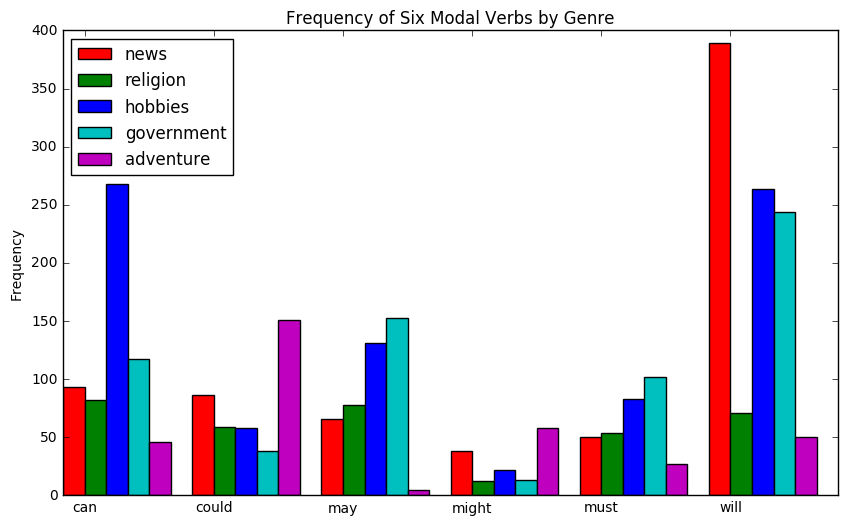

In [179]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
counts = {}
for genre in genres:
    counts[genre] = [cfdist[genre][word] for word in modals]
bar_chart(genres, modals, counts)

In [181]:
from matplotlib import use, pyplot
use('Agg') 
pyplot.savefig('modals.png')
print('Content-Type: text/html')
print()
print('<html><body>')
print('<img src="modals.png"/>')
print('</body></html>')

Content-Type: text/html

<html><body>
<img src="modals.png"/>
</body></html>


/pub/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [196]:
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn
from networkx.drawing.nx_agraph import graphviz_layout

def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name)
        traverse(graph, start, child)

def hyponym_graph(start):
    G = nx.Graph() 
    G.depth = {}
    traverse(G, start, start)
    return G

def graph_draw(graph):
    nx.draw(graph, pos=graphviz_layout(graph),
         node_size = [16 * graph.degree(n) for n in graph],
         node_color = [graph.depth[n] for n in graph],
         with_labels = False)
    matplotlib.pyplot.show()

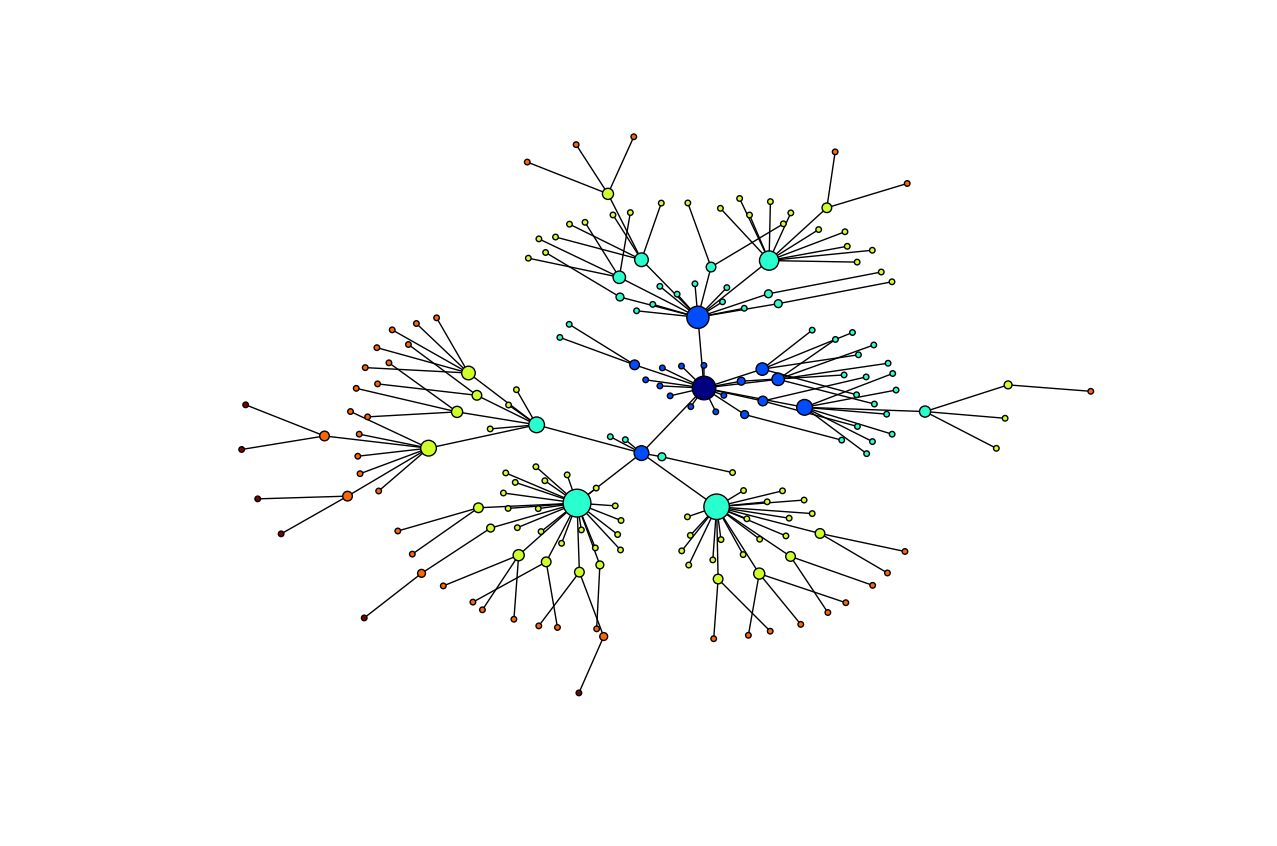

In [200]:
plt.figure(figsize=(12, 8))
dog = wn.synset('dog.n.01')
graph = hyponym_graph(dog)
graph_draw(graph)

In [202]:
import csv
input_file = open("lexicon.csv", "r")
for row in csv.reader(input_file): 
    print(row)

['sleep', ' sli:p', ' v.i', ' a condition of body and mind ...']
['walk', ' wo:k', ' v.intr', ' progress by lifting and setting down each foot ...']
['wake', ' weik', ' intrans', ' cease to sleep']


In [203]:
from numpy import array
cube = array([ [[0,0,0], [1,1,1], [2,2,2]],
               [[3,3,3], [4,4,4], [5,5,5]],
               [[6,6,6], [7,7,7], [8,8,8]] ])

In [204]:
cube[1,1,1]

4

In [205]:
cube[2].transpose()

array([[6, 7, 8],
       [6, 7, 8],
       [6, 7, 8]])

In [206]:
cube[2,1:]

array([[7, 7, 7],
       [8, 8, 8]])

In [207]:
from numpy import linalg
a=array([[4,0], [3,-5]])
u,s,vt = linalg.svd(a)
u

array([[-0.4472136 , -0.89442719],
       [-0.89442719,  0.4472136 ]])

In [208]:
s

array([ 6.32455532,  3.16227766])

In [209]:
vt

array([[-0.70710678,  0.70710678],
       [-0.70710678, -0.70710678]])